In [ ]:
""" np.dot returns new instance? """
import numpy as np

itrack = np.array([2.,3.])
mx = 2*np.eye(2)
ftrack = np.dot(mx,itrack)
print(itrack)
print(ftrack)
print(itrack)
print(id(itrack))
print(id(ftrack))

[2. 3.]
[4. 6.]
[2. 3.]
2151675474640
2151675474160


In [ ]:
""" class inheritance and base attributes? """
import numpy as np

class A():
    def __init__(self,x): 
        self.x = x
class B(A):
    def __init__(self,x): 
        self.x = x
a=A('a')
b=B('b')
print(a.__dict__)
print(b.__dict__)
print(id(a.x))
print(id(b.x))


{'x': 'a'}
{'x': 'b'}
140732457349920
140732456775016


In [ ]:
""" getter setter between different classes """
class Common():
    def __init__(self):
        self.a=None
        self.b=None
        self.c=None
        self.d=None
    
class Top():
    def __init__(self,common,sub=None):
        self.com=common
        self.sub=sub

    # readables
    @property
    def a(self): return self.com.a
    @property
    def b(self): return self.com.b
    @property
    def c(self): return self.com.c
    @property
    def d(self): return self.com.d

    # writables
    @c.setter
    def c(self,v): self.com.c=v
    @d.setter
    def d(self,v): self.com.d=v

class Sub():
    def __init__(self,common,top):
        self.com=common
        self.top=top

    # readables
    @property
    def a(self): return self.com.a
    @property
    def b(self): return self.com.b
    @property
    def c(self): return self.com.c
    @property
    def d(self): return self.com.d

    # writables
    @c.setter
    def c(self,v): self.com.c=v
    @d.setter
    def d(self,v): self.com.d=v

common=Common()
top=Top(common)
sub=Sub(common,top)
top.sub=sub

print(top.a)   
print(sub.a)

sub.c=99
print(top.c)

top.d=4
print(sub.d)

top.com.a=99
print(sub.a)

top.a=99


None
None
99
4
99


AttributeError: property 'a' of 'Top' object has no setter

In [ ]:
"""
    Nulstellen durch Intervallschachtelung
    hier: 
        Vergleich Naeherung mit exakter Rechnung fuer stabile Phasen der long. Separatrix
"""
from math import degrees,radians,sin,cos,fabs,pi

def fun(x,phis):
    return (phis+x)*cos(phis)-sin(phis)-sin(x)   # T.Wangler (6.22)
def funp(x,phis):
    return cos(phis)-cos(x)

def intervall(phis):
    a = pi/2.
    b = -a
    # finde Intervall
    while True:
        fa = fun(a,phis)
        fb = fun(b,phis)
        # print((a,b),(fa,fb))
        if (fa>0. and fb<0.) or (fa<0. and fb>0.):
            break
        else:
            b = b-a
    # finde Nulstelle
    condition = True
    while condition:
        c= (a+b)/2.
        fc = fun(c,phis)
        if (fa>0. and fc>0.) or (fa<0. and fc<0.):
            a = c
            fa = fun(a,phis)
        if (fb>0. and fc>0.) or (fb<0. and fc<0.):
            b = c
            fb = fun(b,phis)
        # print((a,b),(fa,fb))
        if fabs(fa-fb) < 1.e-7:
            condition = False
    return (a+b)/2.
def newton(phis):
    condition = True
    phin = phis-1.e-3
    while condition:
        fn     = fun(phin,phis)
        phinp1 = phin - fn/funp(phin,phis)
        # print((phin,phinp1,fun(phinp1,phis)))
        if fabs(fun(phinp1,phis))<1.e-7:
            condition = False
        else:
            phin = phinp1
    return phinp1
    
# Ergebnis
phis = radians(-30.)
print('Fuer synchrone Phase {} [deg]'.format(degrees(phis)))
print('---------Intervall----------')
phi2 = intervall(phis)
print('intervall:  phi2 {} psis {} [deg]'.format(degrees(phi2),degrees(fabs(phi2)+fabs(phis))))
print('---------Newton-------------')
phi2 = newton(phis)
print('newton:     phi2 {} psis {} [deg]'.format(degrees(phi2),degrees(fabs(phi2)+fabs(phis))))
print('T.Wrangler: phi2 {} psis {} [deg] (pp.178)'.format(degrees(2.*phis),degrees(3.*fabs(phis))))



Fuer synchrone Phase -29.999999999999996 [deg]
---------Intervall----------
intervall:  phi2 -60.872706770896905 psis 90.8727067708969 [deg]
---------Newton-------------
newton:     phi2 -60.87270765830994 psis 90.87270765830995 [deg]
T.Wrangler: phi2 -59.99999999999999 psis 90.0 [deg] (pp.178)


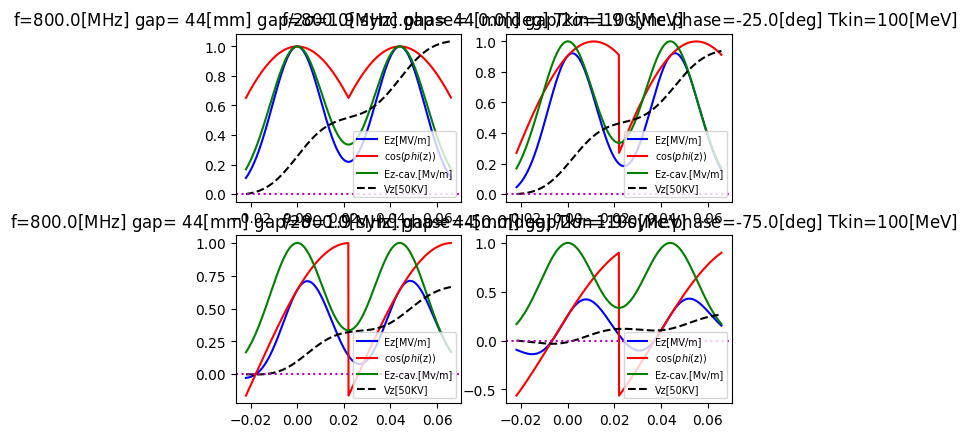

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
"""Gauss normal distribution"""
sys.path.insert(0,'..')
from setutil import PARAMS,Proton

def NGauss(x,sigma,mu):    # Gauss Normalverteilung
    res = np.exp(-(((x-mu)/sigma)**2/2.))
    return res
def A(z,sigma,mu1,mu2):    # Amplitudenfunktion von 2 hintereinander liegenden Kavitaeten
    res = NGauss(z,sigma,mu1)+NGauss(z,sigma,mu2)
    return res
def Ez(z,sigma,mu1,mu2,dphi,bl,zpjmp):
    factor = 2.*np.pi/bl
    z0 = z                      # Ordinate
    Amp = A(z0,sigma,mu1,mu2)
    phix = factor*zpjmp         # phase jump
    phi0 = factor*z0+dphi
    phi1 = phi0-2.*phix
    rf0  = np.cos(phi0)
    rf1  = np.cos(phi1)
    res = NGauss(z0,sigma,mu1)*rf0 + NGauss(z0,sigma,mu2)*rf1 # superposition of 2 cavities
    rf = rf0 if z <= zpjmp else rf1
    return (res,rf)
def Intg(sigma,bl,dphi): # use integral fomula 3.896.2.pp.480 from I.S.Gradshteyn
    ex = np.exp(-2*(np.pi*sigma/bl)**2)
    res = np.sqrt(2*np.pi)*sigma*ex*np.cos(dphi)  # Note: proportional to cos(dphi)! simple!
    return res

def test0():
    particle = Proton(tkin=100.)
    beta     = particle.beta
    freq     = 800.*1.e6    # Hz
    lamb     = PARAMS['clight']/freq
    gap      = 0.044
    # phis     = [0, -30, -60., -90.]
    phis     = [0,-25, -50., -75.]
    for cnt,dphi in enumerate(phis):
        dphi = np.radians(dphi)
        # sigma  = gap/2./3.          # 3 sigma field strength @ cavity join
        sigma  = gap/2./2.2          # our data
        sigma  = gap/2./1.89         # wie in ez0.py
        bl   = beta*lamb             # beta*lambda factor
        mu1  = 0.                    # center of 1st cav. @ z=0
        mu2  = gap                   # center of 2nd cavity
        # zpjmp= (gap/2.+0.005)      # loc. z of phase jump (@ ext. limit of cavity)
        zpjmp= (gap/2.+0.00)         # loc. z of phase jump (@ ext. limit of cavity)
        zr   = mu2+zpjmp            # right limit of intervall
        zl   = -zpjmp               # left limit of intervall
        step = (zr-zl)/1000.
        z    = np.arange(zl,zr,step)
        E    = [Ez(x,sigma,mu1,mu2,dphi,bl,zpjmp)[0] for x in z] # what the particle sees
        RF   = [Ez(x,sigma,mu1,mu2,dphi,bl,zpjmp)[1] for x in z] # the time dependant modulation of the cavity field
        Ez0  = [A(x,sigma,mu1,mu2) for x in z]                   # E(z,r=0) peak field in cavities

        Vz = []; sum = 0
        for i in range(0,len(z)):
            sum += 20*E[i]*step
            Vz.append(sum)   # acc. voltage over intervall in [50KV] units to fit vert. axis
        
        ax = plt.subplot(2,2,cnt+1)
        ax.plot(z,E,  'b-',  label='Ez[MV/m]')
        ax.plot(z,RF, 'r-',  label=r'cos($phi$(z))')
        ax.plot(z,Ez0,'g-',  label='Ez-cav.[Mv/m]')
        ax.plot(z,Vz, 'k--', label='Vz[50KV]')
        ax.set_title(r'f={:5.1f}[MHz] gap={:3.0f}[mm] gap/2$\sigma$={:3.1f} sync.phase={:5.1f}[deg] Tkin={:3.0f}[MeV]'.
            format(freq*1.e-6,gap*1.e3,zpjmp/sigma,np.degrees(dphi),particle.tkin))
        ax.axhline(linestyle=':',color='m')
        ax.legend(loc='lower right',fontsize='x-small')
    plt.show()

if __name__ == '__main__':
    test0()


In [ ]:
""" phase advance """
import sys
sys.path.insert(0,'..')

from math import sqrt
from setutil import tblprnt

c     = 2.997e8  #m/s
m0    = 938.26   #MeV
freq  = 815.0e6  #Hz
lamb  = c/freq   #m
z     = 0.044    #m

def delta_phi(T,z):
    gamma = (T+m0)/m0
    beta  = sqrt(1.-1./gamma**2)
    phi   = 360/beta/lamb*z
    return phi

header = ['T[Mev]','z[m]','delta phi[deg]','delta phi[deg/cm]']
tablrows = []
for t in [10.,50.,100.,150.,200.,250.,1.e3]:
    dphi = delta_phi(t,z)
    tablrow = ['{:8.4g}'.format(t),
                '{:8.4f}'.format(z),
                '{:8.4f}'.format(dphi),
                '{:8.4f}'.format(dphi/(z*1.e2))]
    tablrows.append(tablrow)
print('Phase advance as function of kinetic energy T and distance z')
print('c={:8.4g}[m/s], m0={:8.4g}[MeV/c2], fr={:8.4g}[MHz]'.format(c,m0,freq*1.e-6))
print(tblprnt(header,tablrows))

Phase advance as function of kinetic energy T and distance z
c=2.997e+08[m/s], m0=   938.3[MeV/c2], fr=     815[MHz]
T[Mev]   | z[m]     | delta phi[deg] | delta phi[deg/cm]
      10 |   0.0440 | 297.3875       |  67.5881         
      50 |   0.0440 | 137.1594       |  31.1726         
     100 |   0.0440 | 100.5962       |  22.8628         
     150 |   0.0440 |  85.0232       |  19.3235         
     200 |   0.0440 |  76.0824       |  17.2915         
     250 |   0.0440 |  70.1993       |  15.9544         
    1000 |   0.0440 |  49.2271       |  11.1880         

